In [63]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [64]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation'


In [65]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [66]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [67]:
print(train)

                                image     label
0        images/train\angry\10002.jpg     angry
1        images/train\angry\10016.jpg     angry
2        images/train\angry\10037.jpg     angry
3        images/train\angry\10038.jpg     angry
4        images/train\angry\10057.jpg     angry
...                               ...       ...
27950  images/train\surprise\9969.jpg  surprise
27951  images/train\surprise\9985.jpg  surprise
27952  images/train\surprise\9990.jpg  surprise
27953  images/train\surprise\9992.jpg  surprise
27954  images/train\surprise\9996.jpg  surprise

[27955 rows x 2 columns]


In [68]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [69]:
print(test)
print(test['image'])

                                    image     label
0       images/validation\angry\10052.jpg     angry
1       images/validation\angry\10065.jpg     angry
2       images/validation\angry\10079.jpg     angry
3       images/validation\angry\10095.jpg     angry
4       images/validation\angry\10121.jpg     angry
...                                   ...       ...
7061  images/validation\surprise\9806.jpg  surprise
7062  images/validation\surprise\9830.jpg  surprise
7063  images/validation\surprise\9853.jpg  surprise
7064  images/validation\surprise\9878.jpg  surprise
7065   images/validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/validation\angry\10052.jpg
1         images/validation\angry\10065.jpg
2         images/validation\angry\10079.jpg
3         images/validation\angry\10095.jpg
4         images/validation\angry\10121.jpg
                       ...                 
7061    images/validation\surprise\9806.jpg
7062    images/validation\surprise\9830.jpg

In [70]:
from tqdm.notebook import tqdm

In [71]:
def extract_features(images):
    features = []
    for image_path in tqdm(images):
        img = load_img(image_path, grayscale=True, target_size=(48, 48))  # Load image and resize
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    return features

train_features = extract_features(train['image'])



  0%|          | 0/27955 [00:00<?, ?it/s]

C:\Users\mraja\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [72]:
 test_features = extract_features(test['image'])


  0%|          | 0/7066 [00:00<?, ?it/s]

In [73]:
x_train = train_features/255.0
x_test = test_features/255.0

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [76]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])


In [77]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [78]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [79]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [80]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
219/219 [==============================] - 444s 2s/step - loss: 1.8150 - accuracy: 0.2512 - val_loss: 1.7971 - val_accuracy: 0.2618
Epoch 2/10
219/219 [==============================] - 405s 2s/step - loss: 1.7726 - accuracy: 0.2653 - val_loss: 1.6996 - val_accuracy: 0.3064
Epoch 3/10
219/219 [==============================] - 439s 2s/step - loss: 1.6606 - accuracy: 0.3276 - val_loss: 1.5747 - val_accuracy: 0.3667
Epoch 4/10
219/219 [==============================] - 422s 2s/step - loss: 1.5258 - accuracy: 0.4071 - val_loss: 1.4110 - val_accuracy: 0.4536
Epoch 5/10
219/219 [==============================] - 386s 2s/step - loss: 1.4333 - accuracy: 0.4494 - val_loss: 1.3622 - val_accuracy: 0.4802
Epoch 6/10
219/219 [==============================] - 401s 2s/step - loss: 1.3802 - accuracy: 0.4727 - val_loss: 1.2798 - val_accuracy: 0.5142
Epoch 7/10
219/219 [==============================] - 420s 2s/step - loss: 1.3369 - accuracy: 0.4874 - val_loss: 1.2665 - val_accuracy: 0.5171

In [82]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\mraja\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
from keras.models import model_from_json


In [84]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")


In [85]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [86]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

original image is of sad
1/1 [==============================] - 0s 140ms/step
model prediction is  sad


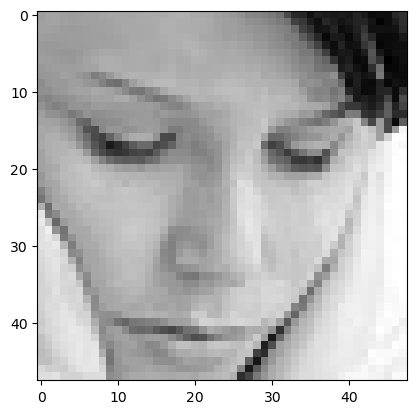

In [87]:
import matplotlib.pyplot as plt
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 27ms/step
model prediction is  fear


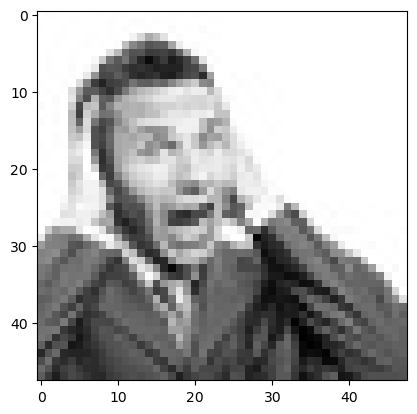

In [90]:
image = 'images/train/fear/17.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

1/1 [==============================] - 0s 31ms/step
Original image is of neutral
Model prediction is neutral


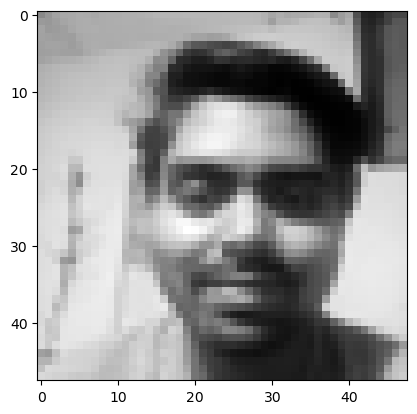

In [89]:
from PIL import Image
import numpy as np

image_path = r"C:\Users\mraja\OneDrive\Documents\python\Face_Emotion_Recognition_Machine_Learning-main\images\train\neutral\0.jpeg"

# Load and preprocess the image using PIL
img = Image.open(image_path).convert('L')  # Convert to grayscale
img = img.resize((48, 48))  # Resize to model input size
img = np.array(img) / 255.0  # Convert to NumPy array and normalize pixel values to [0, 1]

# Reshape image for model prediction
img = img.reshape(1, 48, 48, 1)

# Perform prediction and display
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Original image is of neutral")
print("Model prediction is", pred_label)

import matplotlib.pyplot as plt
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()
